In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from netCDF4 import Dataset
import xarray as xr

# Data

In [2]:
nc = Dataset('./otemp.mnltm.nc', 'r')
ds = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))
ds

c:\Users\user\.conda\envs\ocean_study\lib\site-packages\xarray\coding\times.py:152: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
c:\Users\user\.conda\envs\ocean_study\lib\site-packages\xarray\coding\times.py:716: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
c:\Users\user\.conda\envs\ocean_study\lib\site-packages\xarray\coding\times.py:152: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded

<xarray.Dataset>
Dimensions:  (level: 19, lat: 180, lon: 360, time: 12)
Coordinates:
  * level    (level) float32 0.0 10.0 20.0 30.0 50.0 ... 700.0 800.0 900.0 1e+03
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Data variables:
    otemp    (time, level, lat, lon) float32 ...
Attributes:
    title:          NODC (Levitus) World Ocean Atlas Monthly LTM
    history:        created October 1997 by Hoop
    platform:       Marine Observations
    Conventions:    COARDS
    References:     https://www.psl.noaa.gov/data/gridded/data.nodc.woa94.html
    dataset_title:  NODC (Levitus) World Ocean Atlas 1994

# Vertical profiles

In [3]:
otemp = ds.data_vars['otemp']
weights = np.cos(np.deg2rad(otemp.lat))

otemp_high = otemp.sel(lat=slice(90,60)).weighted(weights).mean(('lon', 'lat', 'time'), skipna=True)
otemp_mid  = otemp.sel(lat=slice(60,30)).weighted(weights).mean(('lon', 'lat', 'time'), skipna=True)
otemp_tro  = otemp.sel(lat=slice(30, 0)).weighted(weights).mean(('lon', 'lat', 'time'), skipna=True)

In [4]:
# DJF, JJA, MAM, SON
print(otemp.groupby("time.season").mean("time").season.values)
otemp_mid_season  = otemp.groupby("time.season").mean("time").sel(lat=slice(60,30)).weighted(weights).mean(('lon', 'lat'), skipna=True)

['DJF' 'JJA' 'MAM' 'SON']


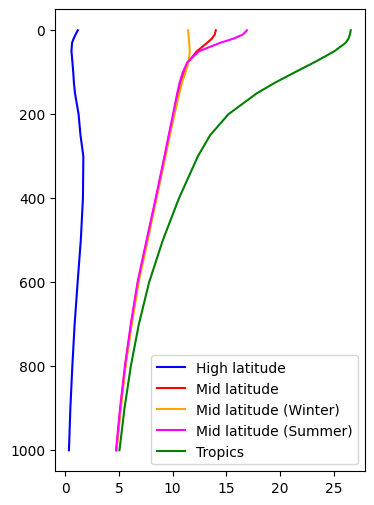

In [5]:
plt.figure(figsize=(4,6))
plt.plot(otemp_high         , otemp.level, color='blue',    label='High latitude')
plt.plot(otemp_mid          , otemp.level, color='red',     label='Mid latitude')
plt.plot(otemp_mid_season[0], otemp.level, color='orange',  label='Mid latitude (Winter)')
plt.plot(otemp_mid_season[1], otemp.level, color='magenta', label='Mid latitude (Summer)')
plt.plot(otemp_tro          , otemp.level, color='green',   label='Tropics')

plt.gca().invert_yaxis()
plt.legend()
plt.show()

# Latitude-Depth plot 

In [6]:
otemp_ = otemp.sel(lat=slice(60,-60)).mean(('lon', 'time'), skipna=True)

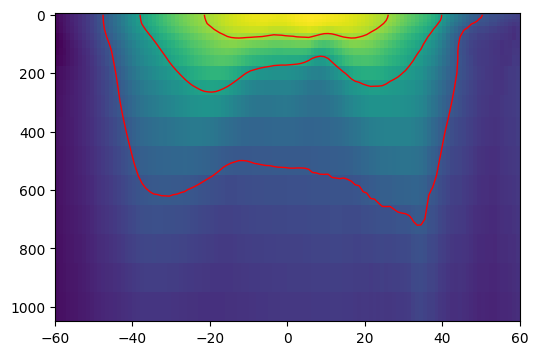

In [7]:
plt.figure(figsize=(6,4))
plt.pcolormesh(otemp_.lat, otemp_.level,  otemp_)
plt.contour(otemp_.lat, otemp_.level, otemp_, levels=3, 
            colors='red', linewidths=1, linestyles='solid')
plt.gca().invert_yaxis()